#MidTerm Project
##Team - 09
###Vidhi Shiyani
###Komal Dodiya
###Aniket Patel

#Problem Statement:
###To classify the hotspots in the new york state county where the number of criminals aged 18 or older is significantly higher, so that the government can implement measures to reduce the conversion rate of juvenile offenders.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Adult_Arrests_18_and_Older_by_County___Beginning_1970_20251025.csv')

In [ ]:
data.head()

,County,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,Property Misdemeanor,Other Misdemeanor
0,Albany,1970,"1,032",563,90,155,4,314,469,179,47,73,170
1,Albany,1971,"1,566",693,119,199,6,369,873,179,111,210,373
2,Albany,1972,"2,604",864,181,215,8,460,"1,740",251,295,417,777
3,Albany,1973,"3,055",955,213,230,28,484,"2,100",298,491,506,805
4,Albany,1974,"3,587","1,070",225,244,17,584,"2,517",354,610,670,883


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3410 entries, 0 to 3409
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   County                3410 non-null   object
 1   Year                  3410 non-null   int64 
 2   Total                 3410 non-null   object
 3   Felony Total          3410 non-null   object
 4   Drug Felony           3410 non-null   object
 5   Violent Felony        3410 non-null   object
 6   DWI Felony            3410 non-null   int64 
 7   Other Felony          3410 non-null   object
 8   Misdemeanor Total     3410 non-null   object
 9   Drug Misdemeanor      3410 non-null   object
 10  DWI Misdemeanor       3410 non-null   object
 11  Property Misdemeanor  3410 non-null   object
 12  Other Misdemeanor     3410 non-null   object
dtypes: int64(2), object(11)
memory usage: 346.5+ KB


In [ ]:
data.shape

(3410, 13)

In [ ]:
data.describe()

,Year,DWI Felony
count,3410.000000,3410.000000
mean,1997.000000,66.691202
std,15.876836,88.229111
min,1970.000000,0.000000
25%,1983.000000,17.000000
50%,1997.000000,37.000000
75%,2011.000000,76.000000
max,2024.000000,613.000000


In [ ]:
#All the arrest numbers are in numeric form but are falling in object data type cause of ','
cols_to_convert = ['Total', 'Felony Total', 'Violent Felony', 'Drug Felony', 'Other Felony',
                   'Misdemeanor Total', 'Drug Misdemeanor', 'DWI Misdemeanor',
                   'Property Misdemeanor', 'Other Misdemeanor']

#Converting columns to numeric
for col in cols_to_convert:
    data[col] = pd.to_numeric(data[col].str.replace(',', ''), errors='coerce')

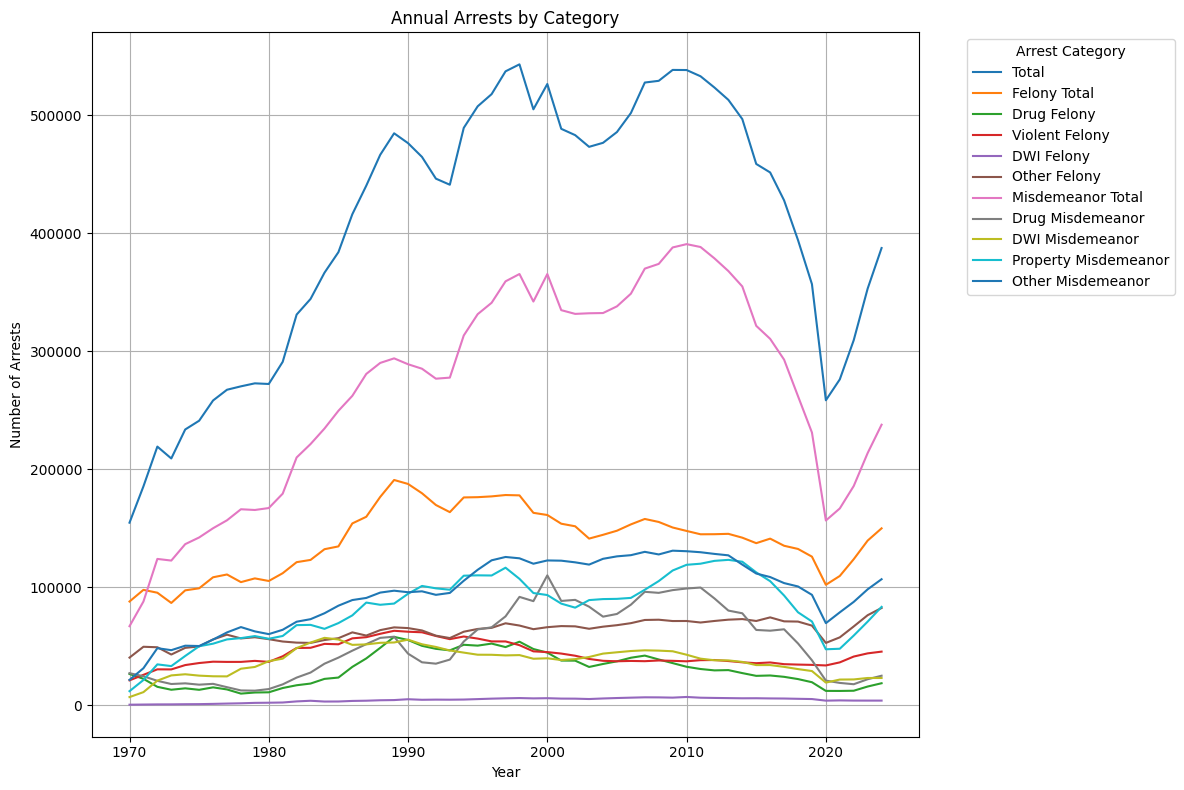

In [ ]:
#Grouping data by year and sum the arrest categories
annual_arrests = data.groupby('Year')[['Total', 'Felony Total', 'Drug Felony', 'Violent Felony',
                                       'DWI Felony', 'Other Felony', 'Misdemeanor Total',
                                       'Drug Misdemeanor', 'DWI Misdemeanor', 'Property Misdemeanor',
                                       'Other Misdemeanor']].sum()

plt.figure(figsize=(12, 8))
annual_arrests.plot(kind='line', ax=plt.gca())
plt.title('Annual Arrests by Category')
plt.xlabel('Year')
plt.ylabel('Number of Arrests')
plt.legend(title='Arrest Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
data.isnull().sum()

,0
County,0
Year,0
Total,0
Felony Total,0
Drug Felony,0
Violent Felony,0
DWI Felony,0
Other Felony,0
Misdemeanor Total,0
Drug Misdemeanor,0


In [ ]:
grouped_data = data.groupby(['County', 'Year']).sum()
display(grouped_data.head())

Total  Felony Total  Drug Felony  Violent Felony  DWI Felony  \
County Year                                                                 
Albany 1970   1032           563           90             155           4   
       1971   1566           693          119             199           6   
       1972   2604           864          181             215           8   
       1973   3055           955          213             230          28   
       1974   3587          1070          225             244          17   

             Other Felony  Misdemeanor Total  Drug Misdemeanor  \
County Year                                                      
Albany 1970           314                469               179   
       1971           369                873               179   
       1972           460               1740               251   
       1973           484               2100               298   
       1974           584               2517               354   

             DWI Misdemeanor  Property Misdemeanor  Other Misdemeanor  
County Year                                                            
Albany 1970               47                    73                170  
       1971              111                   210                373  
       1972              295                   417                777  
       1973              491                   506                805  
       1974              610                   670                883

In [ ]:
grouped_data = grouped_data.reset_index()
grouped_data = grouped_data.sort_values(by=['County', 'Year'])

grouped_data['Total_Arrests_Lag1'] = grouped_data.groupby('County')['Total'].shift(1)
display(grouped_data.head())

,County,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,Property Misdemeanor,Other Misdemeanor,Total_Arrests_Lag1
0,Albany,1970,1032,563,90,155,4,314,469,179,47,73,170,NaN
1,Albany,1971,1566,693,119,199,6,369,873,179,111,210,373,1032.0
2,Albany,1972,2604,864,181,215,8,460,1740,251,295,417,777,1566.0
3,Albany,1973,3055,955,213,230,28,484,2100,298,491,506,805,2604.0
4,Albany,1974,3587,1070,225,244,17,584,2517,354,610,670,883,3055.0


In [ ]:
grouped_data_encoded = pd.get_dummies(grouped_data, columns=['County'], drop_first=True)
display(grouped_data_encoded.head())

,Year,Total,Felony Total,Drug Felony,Violent Felony,DWI Felony,Other Felony,Misdemeanor Total,Drug Misdemeanor,DWI Misdemeanor,...,County_Sullivan,County_Tioga,County_Tompkins,County_Ulster,County_Warren,County_Washington,County_Wayne,County_Westchester,County_Wyoming,County_Yates
0,1970,1032,563,90,155,4,314,469,179,47,...,False,False,False,False,False,False,False,False,False,False
1,1971,1566,693,119,199,6,369,873,179,111,...,False,False,False,False,False,False,False,False,False,False
2,1972,2604,864,181,215,8,460,1740,251,295,...,False,False,False,False,False,False,False,False,False,False
3,1973,3055,955,213,230,28,484,2100,298,491,...,False,False,False,False,False,False,False,False,False,False
4,1974,3587,1070,225,244,17,584,2517,354,610,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
split_year = 2020
train_data = grouped_data_encoded[grouped_data_encoded['Year'] < split_year].copy()
test_data = grouped_data_encoded[grouped_data_encoded['Year'] >= split_year].copy()

print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (3100, 74)
Testing data shape: (310, 74)


In [ ]:
train_data.fillna(0, inplace=True)

test_data.fillna(0, inplace=True)

print("Training data shape after handling missing values:", train_data.shape)
print("Testing data shape after handling missing values:", test_data.shape)

Training data shape after handling missing values: (3100, 74)
Testing data shape after handling missing values: (310, 74)


In [ ]:
train_data.isnull().sum()

,0
Year,0
Total,0
Felony Total,0
Drug Felony,0
Violent Felony,0
...,...
County_Washington,0
County_Wayne,0
County_Westchester,0
County_Wyoming,0


#Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

hotspot_threshold = data['Total'].quantile(0.75)
data['Hotspot'] = (data['Total'] > hotspot_threshold).astype(int)

classification_features = data.drop(['Total', 'Hotspot', 'Felony Total', 'Drug Felony', 'Violent Felony', 'DWI Felony',
                                   'Other Felony', 'Misdemeanor Total', 'Drug Misdemeanor',
                                   'DWI Misdemeanor', 'Property Misdemeanor', 'Other Misdemeanor'], axis=1)

classification_features_encoded = pd.get_dummies(classification_features, columns=['County'], drop_first=True)

classification_target = data['Hotspot']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(classification_features_encoded,
                                                                    classification_target,
                                                                    test_size=0.2,
                                                                    random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_cls, y_train_cls)

predictions_rf = rf_model.predict(X_test_cls)

accuracy_rf = accuracy_score(y_test_cls, predictions_rf)
report_rf = classification_report(y_test_cls, predictions_rf)

print(f"Random Forest Classifier Accuracy: {accuracy_rf:.2f}")
print("\nClassification Report:")
print(report_rf)

Random Forest Classifier Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       503
           1       0.98      0.91      0.94       179

    accuracy                           0.97       682
   macro avg       0.97      0.95      0.96       682
weighted avg       0.97      0.97      0.97       682



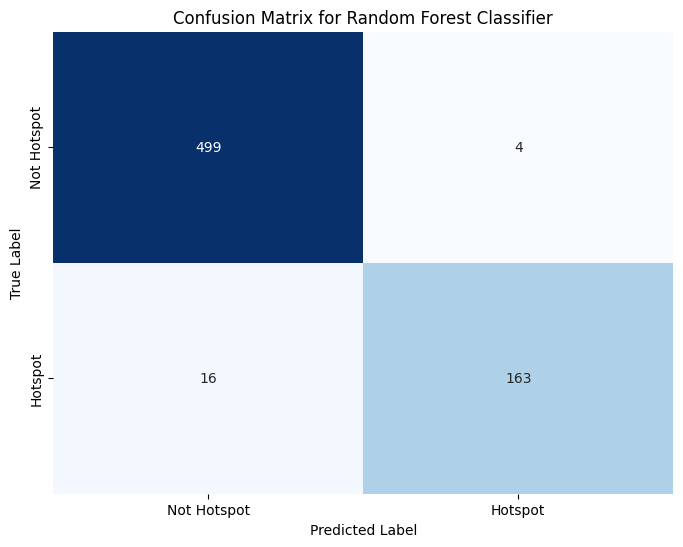

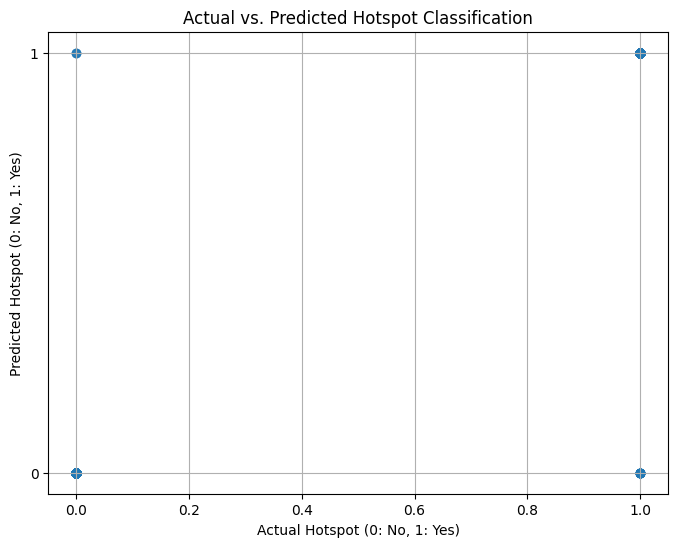

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_cls, predictions_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Hotspot', 'Hotspot'], yticklabels=['Not Hotspot', 'Hotspot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_cls, predictions_rf, alpha=0.5)
plt.xlabel("Actual Hotspot (0: No, 1: Yes)")
plt.ylabel("Predicted Hotspot (0: No, 1: Yes)")
plt.title("Actual vs. Predicted Hotspot Classification")
plt.yticks([0, 1])
plt.grid(True)
plt.show()

/tmp/ipython-input-3810425082.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')


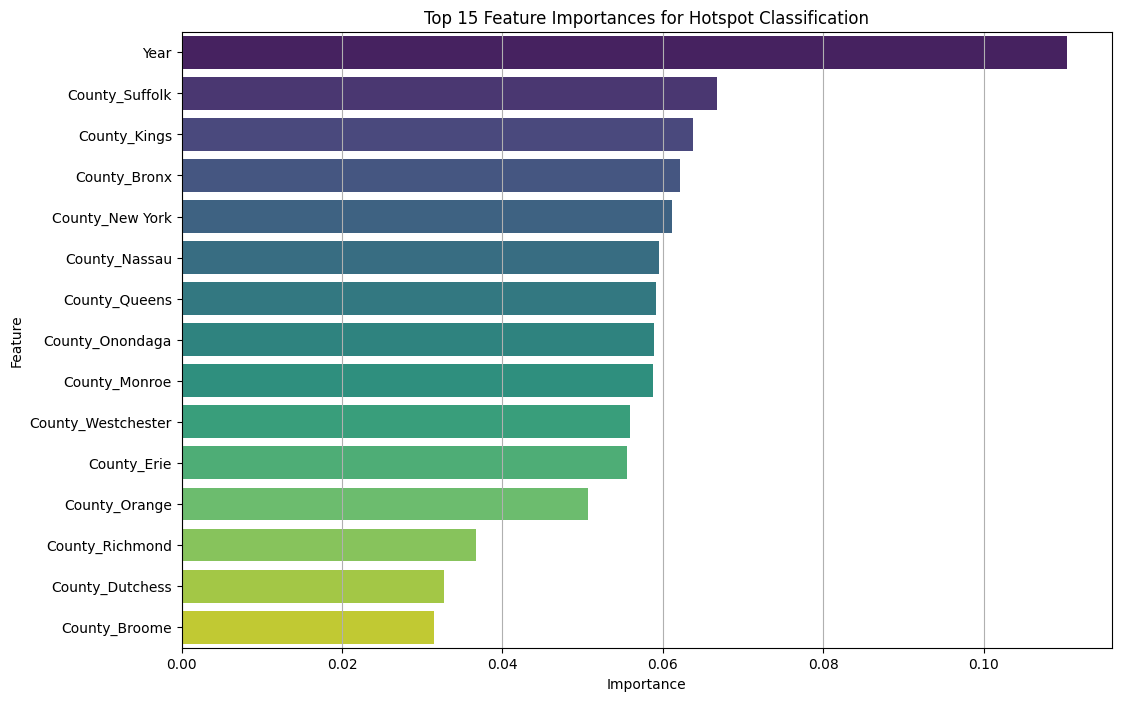

In [ ]:
feature_importances = rf_model.feature_importances_
feature_importances_series = pd.Series(feature_importances, index=X_train_cls.columns)
sorted_feature_importances = feature_importances_series.sort_values(ascending=False)

top_n = 15
top_feature_importances = sorted_feature_importances.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances for Hotspot Classification')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

In [ ]:
hotspot_counts = data.groupby('County')['Hotspot'].mean()
ranked_counties = hotspot_counts.sort_values(ascending=False)

print("Counties Ranked by Proportion of Years as Hotspots:")
display(ranked_counties)

Counties Ranked by Proportion of Years as Hotspots:


,Hotspot
County,
Bronx,1.0
Erie,1.0
Kings,1.0
Nassau,1.0
Queens,1.0
...,...
Tompkins,0.0
Washington,0.0
Wayne,0.0


In [ ]:
ranked_counties.head()

,Hotspot
County,
Bronx,1.0
Erie,1.0
Kings,1.0
Nassau,1.0
Queens,1.0


In [ ]:
ranked_counties.tail()

,Hotspot
County,
Tompkins,0.0
Washington,0.0
Wayne,0.0
Wyoming,0.0
Yates,0.0


#Logisitic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_model = LogisticRegression(random_state=42, solver='liblinear') #Using 'liblinear' solver as it's good for small datasets and handles L2 regularization by default
logreg_model.fit(X_train_cls, y_train_cls)

print("Logistic Regression model trained successfully.")

predictions_logreg = logreg_model.predict(X_test_cls)

accuracy_logreg = accuracy_score(y_test_cls, predictions_logreg)
report_logreg = classification_report(y_test_cls, predictions_logreg)

print(f"\nLogistic Regression Classifier Accuracy: {accuracy_logreg:.2f}")
print("\nClassification Report:")
print(report_logreg)

Logistic Regression model trained successfully.

Logistic Regression Classifier Accuracy: 0.92

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       503
           1       0.88      0.79      0.83       179

    accuracy                           0.92       682
   macro avg       0.90      0.87      0.89       682
weighted avg       0.92      0.92      0.91       682



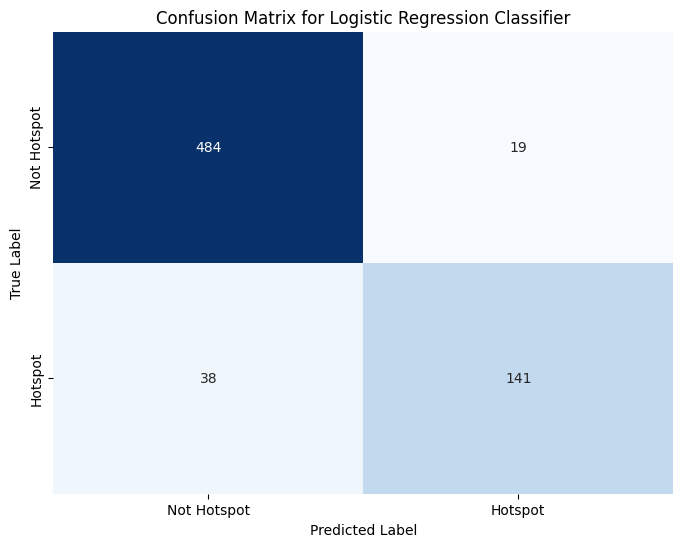

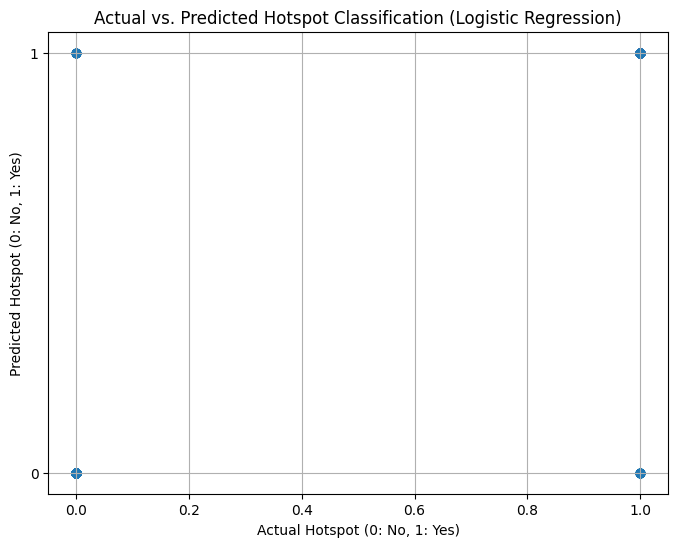

In [ ]:
cm_logreg = confusion_matrix(y_test_cls, predictions_logreg)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Hotspot', 'Hotspot'], yticklabels=['Not Hotspot', 'Hotspot'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Logistic Regression Classifier')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test_cls, predictions_logreg, alpha=0.5)
plt.xlabel("Actual Hotspot (0: No, 1: Yes)")
plt.ylabel("Predicted Hotspot (0: No, 1: Yes)")
plt.title("Actual vs. Predicted Hotspot Classification (Logistic Regression)")
plt.yticks([0, 1])
plt.grid(True)
plt.show()

/tmp/ipython-input-1800223445.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')


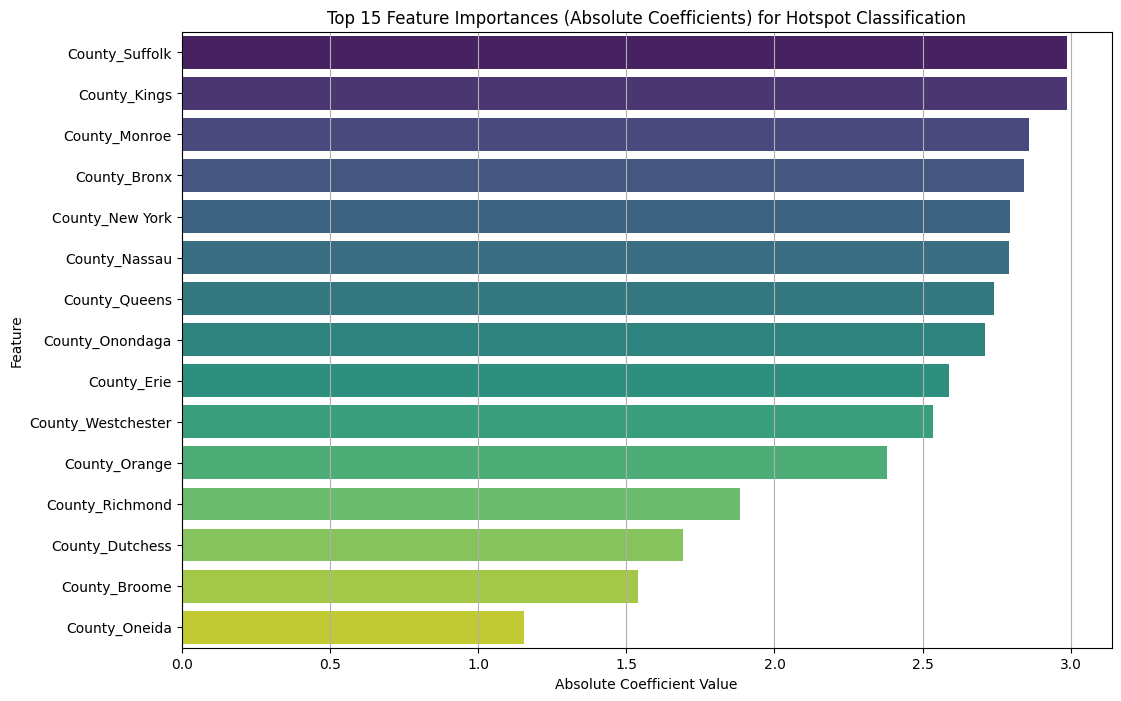

In [ ]:
feature_importances = logreg_model.coef_[0]

feature_importances_series = pd.Series(feature_importances, index=X_train_cls.columns)
sorted_feature_importances = feature_importances_series.abs().sort_values(ascending=False)

top_n = 15
top_feature_importances = sorted_feature_importances.head(top_n)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_feature_importances.values, y=top_feature_importances.index, palette='viridis')
plt.title(f'Top {top_n} Feature Importances (Absolute Coefficients) for Hotspot Classification')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.grid(axis='x')
plt.show()

In [ ]:
print("Counties Ranked by Proportion of Years as Hotspots:")
display(ranked_counties)

Counties Ranked by Proportion of Years as Hotspots:


,Hotspot
County,
Bronx,1.0
Erie,1.0
Kings,1.0
Nassau,1.0
Queens,1.0
...,...
Tompkins,0.0
Washington,0.0
Wayne,0.0


#Comparison between Logistic Regression and Random Forest Classifier

Classification Model Performance Comparison:


,Model,Accuracy,Precision (Hotspot),Recall (Hotspot),F1-score (Hotspot)
0,Random Forest,0.970674,0.98,0.91,0.94
1,Logistic Regression,0.916422,0.88,0.79,0.83


/tmp/ipython-input-1800629107.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=classification_performance_df, palette='viridis')


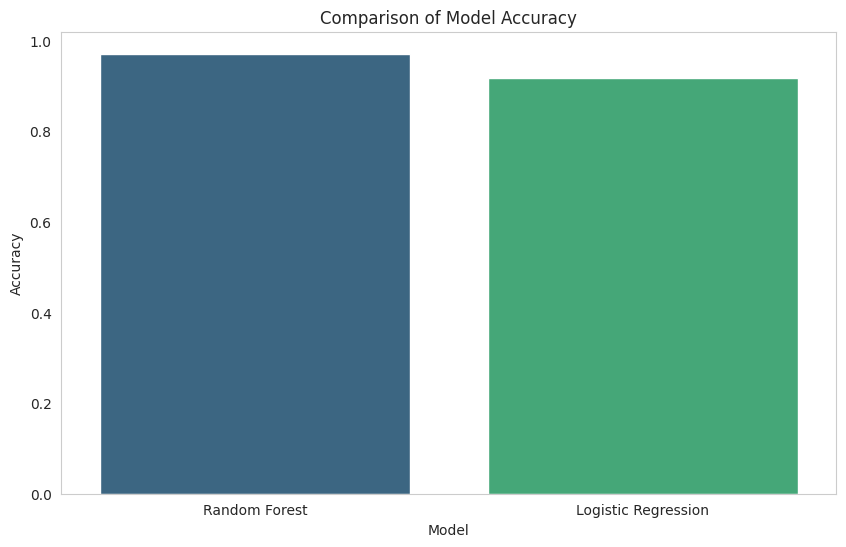

/tmp/ipython-input-1800629107.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='F1-score (Hotspot)', data=classification_performance_df, palette='plasma')


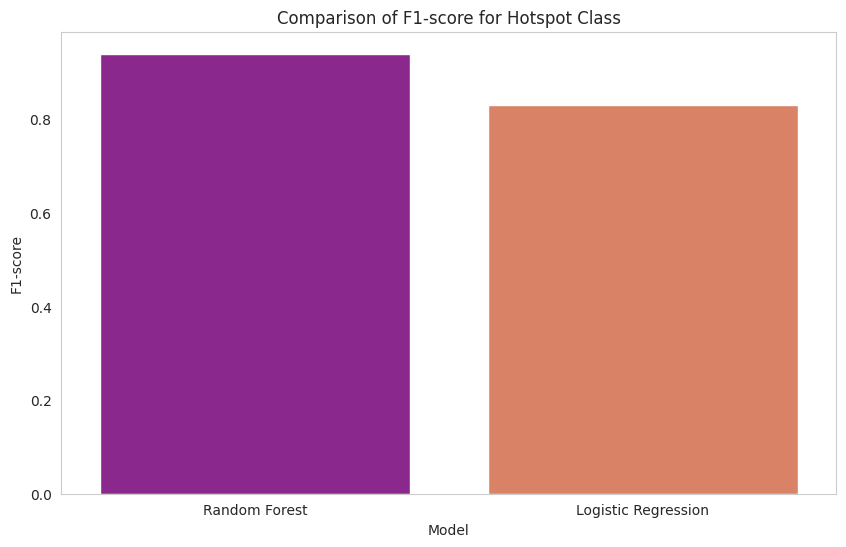

/tmp/ipython-input-1800629107.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision (Hotspot)', data=classification_performance_df, palette='magma')


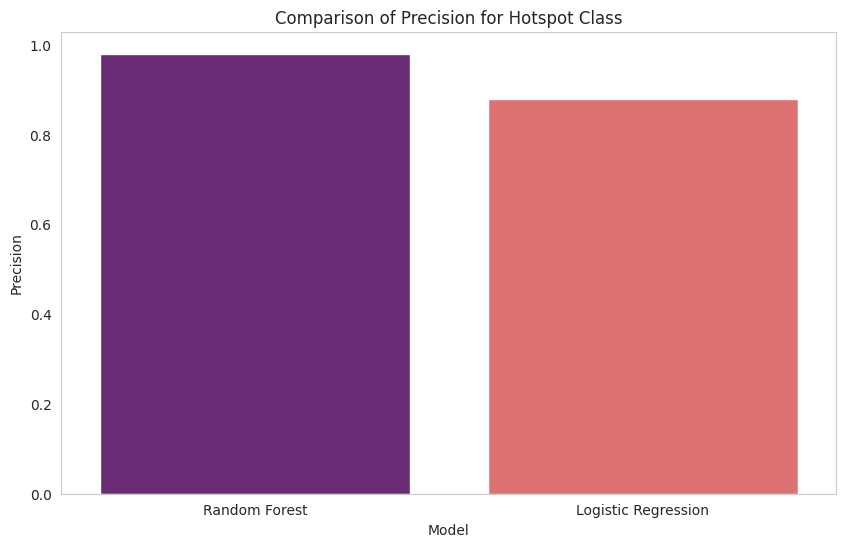

/tmp/ipython-input-1800629107.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall (Hotspot)', data=classification_performance_df, palette='cividis')


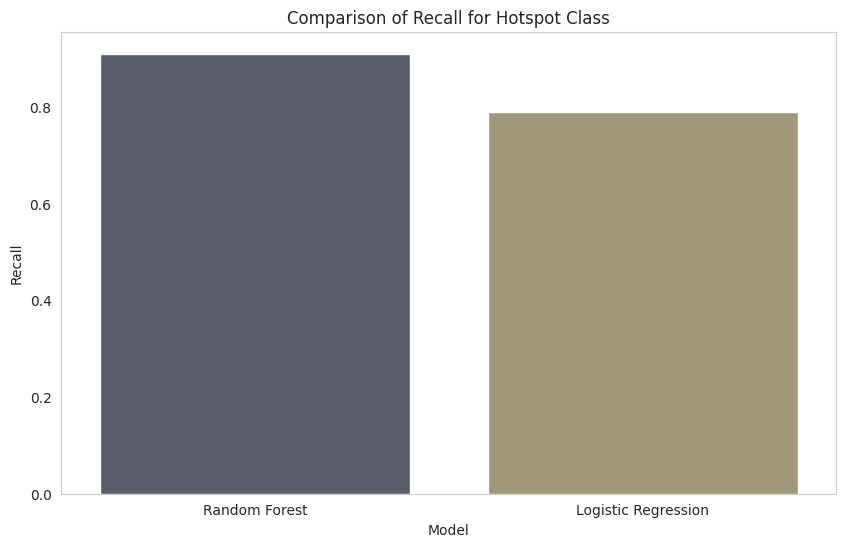

from matplotlib import pyplot as plt
classification_performance_df['Accuracy'].plot(kind='hist', bins=20, title='Accuracy')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['Precision (Hotspot)'].plot(kind='hist', bins=20, title='Precision (Hotspot)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['Recall (Hotspot)'].plot(kind='hist', bins=20, title='Recall (Hotspot)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['F1-score (Hotspot)'].plot(kind='hist', bins=20, title='F1-score (Hotspot)')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
classification_performance_df.groupby('Model').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df.plot(kind='scatter', x='Accuracy', y='Precision (Hotspot)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df.plot(kind='scatter', x='Precision (Hotspot)', y='Recall (Hotspot)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df.plot(kind='scatter', x='Recall (Hotspot)', y='F1-score (Hotspot)', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['Accuracy'].plot(kind='line', figsize=(8, 4), title='Accuracy')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['Precision (Hotspot)'].plot(kind='line', figsize=(8, 4), title='Precision (Hotspot)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['Recall (Hotspot)'].plot(kind='line', figsize=(8, 4), title='Recall (Hotspot)')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
classification_performance_df['F1-score (Hotspot)'].plot(kind='line', figsize=(8, 4), title='F1-score (Hotspot)')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(classification_performance_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(classification_performance_df, x='Accuracy', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(classification_performance_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(classification_performance_df, x='Precision (Hotspot)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(classification_performance_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(classification_performance_df, x='Recall (Hotspot)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(classification_performance_df['Model'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(classification_performance_df, x='F1-score (Hotspot)', y='Model', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
report_rf_lines = report_rf.splitlines()
rf_hotspot_metrics = [line for line in report_rf_lines if line.strip().startswith('1')][0].split()

report_logreg_lines = report_logreg.splitlines()
logreg_hotspot_metrics = [line for line in report_logreg_lines if line.strip().startswith('1')][0].split()


classification_performance = {
    'Model': ['Random Forest', 'Logistic Regression'],
    'Accuracy': [accuracy_rf, accuracy_logreg],
    'Precision (Hotspot)': [float(rf_hotspot_metrics[1]), float(logreg_hotspot_metrics[1])],
    'Recall (Hotspot)': [float(rf_hotspot_metrics[2]), float(logreg_hotspot_metrics[2])],
    'F1-score (Hotspot)': [float(rf_hotspot_metrics[3]), float(logreg_hotspot_metrics[3])]
}
classification_performance_df = pd.DataFrame(classification_performance)

print("Classification Model Performance Comparison:")
display(classification_performance_df)

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=classification_performance_df, palette='viridis')
plt.title('Comparison of Model Accuracy')
plt.ylabel('Accuracy')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1-score (Hotspot)', data=classification_performance_df, palette='plasma')
plt.title('Comparison of F1-score for Hotspot Class')
plt.ylabel('F1-score')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision (Hotspot)', data=classification_performance_df, palette='magma')
plt.title('Comparison of Precision for Hotspot Class')
plt.ylabel('Precision')
plt.grid(axis='y')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall (Hotspot)', data=classification_performance_df, palette='cividis')
plt.title('Comparison of Recall for Hotspot Class')
plt.ylabel('Recall')
plt.grid(axis='y')
plt.show()

sns.set_style("white")

Attempting to load shapefile: /content/drive/MyDrive/kx-new-york-state-counties-SHP/new-york-state-counties.shp
Geospatial data loaded successfully.


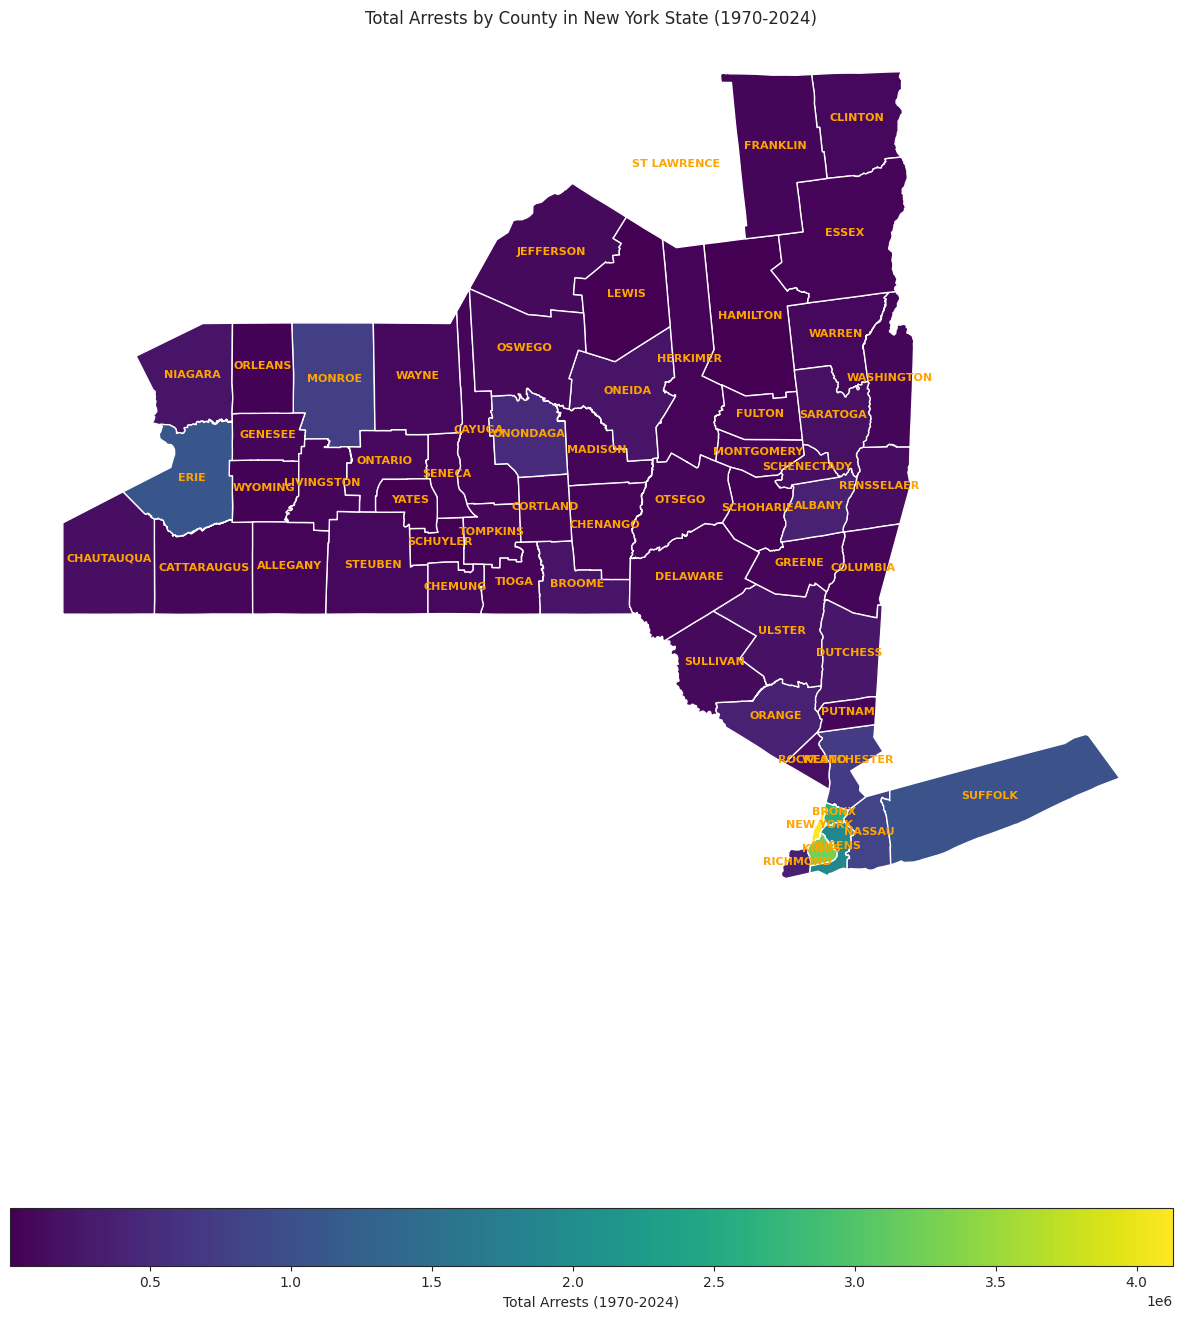

In [ ]:
import geopandas as gpd
import os

shapefile_folder_path = '/content/drive/MyDrive/kx-new-york-state-counties-SHP'
shp_file = None
for file in os.listdir(shapefile_folder_path):
    if file.endswith('.shp'):
        shp_file = file
        break

if shp_file:
    shapefile_path = os.path.join(shapefile_folder_path, shp_file)
    print(f"Attempting to load shapefile: {shapefile_path}")
    try:
        nys_counties = gpd.read_file(shapefile_path)
        print("Geospatial data loaded successfully.")

        county_total_arrests = data.groupby('County')['Total'].sum().reset_index()
        county_total_arrests.rename(columns={'Total': 'Total_Arrests'}, inplace=True)

        nys_counties['NAME'] = nys_counties['NAME'].str.upper()
        county_total_arrests['County'] = county_total_arrests['County'].str.upper()

        merged_data = nys_counties.set_index('NAME').join(county_total_arrests.set_index('County'))
        fig, ax = plt.subplots(1, 1, figsize=(15, 25))
        merged_data.plot(column='Total_Arrests', ax=ax, legend=True, cmap='viridis',
                         legend_kwds={'label': "Total Arrests (1970-2024)",
                                      'orientation': "horizontal"})

        #Adding county labels
        for idx, row in merged_data.iterrows():
            if not row.geometry.is_empty:
                try:

                    centroid = row.geometry.centroid
                    ax.annotate(text=idx, xy=(centroid.x, centroid.y),
                                horizontalalignment='center', fontsize=8, color='orange', weight='bold')
                except Exception as e:
                    print(f"Could not annotate county {idx}: {e}")


        ax.set_title('Total Arrests by County in New York State (1970-2024)')
        ax.set_axis_off()
        plt.show()

    except Exception as e:
        print(f"Error loading shapefile or plotting: {e}")
        print("Please ensure all necessary shapefile components (.shp, .shx, .dbf, etc.) are in the specified folder.")
else:
    print(f"No .shp file found in the specified folder: {shapefile_folder_path}")
    print("Please ensure the shapefile components are in the correct folder.")